In [1]:
# DummyClassifier from sklearn is used to create a baseline accuracy.
from sklearn.dummy import DummyClassifier 
# TfidfVectorizer is used to create a sparce matrices of tf-idf scores to run through modeling
from sklearn.feature_extraction.text import TfidfVectorizer
# Import to split the data into train, test, split
from sklearn.model_selection import train_test_split
# Import to model the data
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# Import to understand the data modeling scores
from sklearn.metrics import classification_report, confusion_matrix, recall_score, plot_confusion_matrix, accuracy_score
import acquire
import prepare
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean
rs = 123

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = acquire.get_github_data()

In [3]:
# prepare the data by creating clean, stemmed and lemmatized columns
df = prepare.prep_github_data(df, column='readme_contents')

In [4]:
train, validate, test = prepare.split_github_data(df)

train---> (89, 6)
validate---> (39, 6)
test---> (32, 6)


In [5]:
# Creates a list of top three languages from dataframe
top_languages = ['JavaScript','Python','TypeScript']
# Create a new version of our df to transform for modeling
model = df.copy()
# Rename the languages that are not in the top three "not_top"
model['language'] = model.language.apply(lambda lang : lang if lang in top_languages else "not_top")
# show the distribution
model.language.value_counts(normalize=True)

JavaScript    0.42500
Python        0.36250
not_top       0.14375
TypeScript    0.06875
Name: language, dtype: float64

In [6]:
# baseline prediction
print(f'Baseline Accuracy: {round(max(train.language.value_counts()) / train.shape[0] *100)}%')

Baseline Accuracy: 43%


In [7]:
# Create the tf-idf model
tfidf = TfidfVectorizer()
# Fit the model and create the X, y variables for modeling
X = tfidf.fit_transform(model.lemmatized)
y = model.language 
# Split the data into train (55%) validate (24%) test (20%) split
X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state = rs)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, stratify=y_train_validate, test_size=.3, random_state = rs)

In [8]:
# Create Result Dataframes to store actual and predictive scores from the models
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))

In [9]:
# Create and fit each model
lm = LogisticRegression(multi_class='multinomial',random_state=rs).fit(X_train, y_train)
dtc = DecisionTreeClassifier(max_depth=5, random_state=rs).fit(X_train, y_train)
rf = RandomForestClassifier(min_samples_leaf=3,max_depth=5, random_state=rs).fit(X_train,y_train)
knn = KNeighborsClassifier().fit(X_train,y_train)


In [10]:
# Store the train predictions in our result df
train['lm_predicted'] = lm.predict(X_train)
train['dtc_predicted'] = dtc.predict(X_train)
train['rf_predicted'] = rf.predict(X_train)
train['knn_predicted'] = knn.predict(X_train)

In [11]:
print('Logistic Regression Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.lm_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.lm_predicted, train.actual))
print('---')
print(classification_report(train.actual, train.lm_predicted))

Logistic Regression Accuracy: 82.02%
---
Confusion Matrix
actual        JavaScript  Python  TypeScript  not_top
lm_predicted                                         
JavaScript            38       1           6        8
Python                 0      31           0        1
not_top                0       0           0        4
---
              precision    recall  f1-score   support

  JavaScript       0.72      1.00      0.84        38
      Python       0.97      0.97      0.97        32
  TypeScript       0.00      0.00      0.00         6
     not_top       1.00      0.31      0.47        13

    accuracy                           0.82        89
   macro avg       0.67      0.57      0.57        89
weighted avg       0.80      0.82      0.77        89



In [12]:
print('Decision Tree Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.dtc_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.dtc_predicted, train.actual))
print('---')
print(classification_report(train.actual, train.dtc_predicted))

Decision Tree Accuracy: 83.15%
---
Confusion Matrix
actual         JavaScript  Python  TypeScript  not_top
dtc_predicted                                         
JavaScript             38       8           3        4
Python                  0      24           0        0
TypeScript              0       0           3        0
not_top                 0       0           0        9
---
              precision    recall  f1-score   support

  JavaScript       0.72      1.00      0.84        38
      Python       1.00      0.75      0.86        32
  TypeScript       1.00      0.50      0.67         6
     not_top       1.00      0.69      0.82        13

    accuracy                           0.83        89
   macro avg       0.93      0.74      0.79        89
weighted avg       0.88      0.83      0.83        89



In [13]:
print('Random Forest Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.rf_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.rf_predicted, train.actual))
print('---')
print(classification_report(train.actual, train.rf_predicted))

Random Forest Accuracy: 73.03%
---
Confusion Matrix
actual        JavaScript  Python  TypeScript  not_top
rf_predicted                                         
JavaScript            38       8           5        9
Python                 0      24           0        2
TypeScript             0       0           1        0
not_top                0       0           0        2
---
              precision    recall  f1-score   support

  JavaScript       0.63      1.00      0.78        38
      Python       0.92      0.75      0.83        32
  TypeScript       1.00      0.17      0.29         6
     not_top       1.00      0.15      0.27        13

    accuracy                           0.73        89
   macro avg       0.89      0.52      0.54        89
weighted avg       0.82      0.73      0.69        89



In [14]:
print('KNN Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.knn_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.knn_predicted, train.actual))
print('---')
print(classification_report(train.actual, train.knn_predicted))

KNN Accuracy: 69.66%
---
Confusion Matrix
actual         JavaScript  Python  TypeScript  not_top
knn_predicted                                         
JavaScript             32      10           3        5
Python                  4      22           0        2
TypeScript              1       0           3        1
not_top                 1       0           0        5
---
              precision    recall  f1-score   support

  JavaScript       0.64      0.84      0.73        38
      Python       0.79      0.69      0.73        32
  TypeScript       0.60      0.50      0.55         6
     not_top       0.83      0.38      0.53        13

    accuracy                           0.70        89
   macro avg       0.71      0.60      0.63        89
weighted avg       0.72      0.70      0.69        89



In [15]:
# Assign the validate predictions to the results df
validate['lm_predicted'] = lm.predict(X_validate)
validate['dtc_predicted'] = dtc.predict(X_validate)
validate['rf_predicted'] = rf.predict(X_validate)
validate['knn_predicted'] = knn.predict(X_validate)

In [16]:
print('Logistic Regression Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.lm_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate.lm_predicted, validate.actual))
print('---')
print(classification_report(validate.actual, validate.lm_predicted))

Logistic Regression Accuracy: 58.97%
---
Confusion Matrix
actual        JavaScript  Python  TypeScript  not_top
lm_predicted                                         
JavaScript            16       7           3        4
Python                 1       7           0        1
---
              precision    recall  f1-score   support

  JavaScript       0.53      0.94      0.68        17
      Python       0.78      0.50      0.61        14
  TypeScript       0.00      0.00      0.00         3
     not_top       0.00      0.00      0.00         5

    accuracy                           0.59        39
   macro avg       0.33      0.36      0.32        39
weighted avg       0.51      0.59      0.52        39



In [17]:
print('Decision Tree Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.dtc_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate.dtc_predicted, validate.actual))
print('---')
print(classification_report(validate.actual, validate.dtc_predicted))

Decision Tree Accuracy: 56.41%
---
Confusion Matrix
actual         JavaScript  Python  TypeScript  not_top
dtc_predicted                                         
JavaScript             16       7           1        4
Python                  0       5           1        0
not_top                 1       2           1        1
---
              precision    recall  f1-score   support

  JavaScript       0.57      0.94      0.71        17
      Python       0.83      0.36      0.50        14
  TypeScript       0.00      0.00      0.00         3
     not_top       0.20      0.20      0.20         5

    accuracy                           0.56        39
   macro avg       0.40      0.37      0.35        39
weighted avg       0.57      0.56      0.52        39



In [18]:
print('Random Forest Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.rf_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate.rf_predicted, validate.actual))
print('---')
print(classification_report(validate.actual, validate.rf_predicted))

Random Forest Accuracy: 58.97%
---
Confusion Matrix
actual        JavaScript  Python  TypeScript  not_top
rf_predicted                                         
JavaScript            17       8           3        3
Python                 0       6           0        2
---
              precision    recall  f1-score   support

  JavaScript       0.55      1.00      0.71        17
      Python       0.75      0.43      0.55        14
  TypeScript       0.00      0.00      0.00         3
     not_top       0.00      0.00      0.00         5

    accuracy                           0.59        39
   macro avg       0.32      0.36      0.31        39
weighted avg       0.51      0.59      0.50        39



In [19]:
print('KNN Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.knn_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate.knn_predicted, validate.actual))
print('---')
print(classification_report(validate.actual, validate.knn_predicted))

KNN Accuracy: 69.23%
---
Confusion Matrix
actual         JavaScript  Python  TypeScript  not_top
knn_predicted                                         
JavaScript             14       4           1        1
Python                  2      10           1        1
not_top                 1       0           1        3
---
              precision    recall  f1-score   support

  JavaScript       0.70      0.82      0.76        17
      Python       0.71      0.71      0.71        14
  TypeScript       0.00      0.00      0.00         3
     not_top       0.60      0.60      0.60         5

    accuracy                           0.69        39
   macro avg       0.50      0.53      0.52        39
weighted avg       0.64      0.69      0.66        39



In [20]:
# Assign the predicitons to the results df
#test['lm_predicted'] = lm.predict(X_test)
#test['dtc_predicted'] = dtc.predict(X_test)
#test['rf_predicted'] = rf.predict(X_test)
test['knn_predicted'] = knn.predict(X_test)

In [21]:
model_list = [lm, dtc, rf, knn]

model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'KNN']

language_names = ['JavaScript', 'Python', 'TypeScript','not_top' ]

In [22]:
def test_model(X_train, y_train, X_validate, y_validate, model, model_name, score_df):
    '''
    Function takes in X and y train
    X and y validate (or test) 
    A model with it's hyper parameters
    And a df to store the scores 

    - Set up an empty dataframe with score_df first
    - score_df = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score', 'test_score'])
    '''
    this_model = model

    this_model.fit(X_train, y_train)

    # Check with Validate

    train_score = this_model.score(X_train, y_train)
    
    validate_score = this_model.score(X_validate, y_validate)
    
    test_score = this_model.score(X_test, y_test)
    
    model_dict = {'model_name': model_name, 
                  'train_score':  round(train_score*100,2), 
                  'validate_score': round(validate_score*100,2),
                  'test_score': round(test_score*100,2)}
    score_df = score_df.append(model_dict, ignore_index = True)
    
    return score_df

In [23]:
#for model, name in zip(model_list, model_names):
    #score_df = test_model(X_train, y_train, X_validate, y_validate, model, name, score_df)
    
    #(model, name, X_train, y_train, X_validate, y_validate, model_names)

In [24]:
#score_df.sort_values(by = 'validate_score', ascending = False)

In [25]:
def print_metrics(model, X, y, pred, language_names, set_name = 'This Set'):
    '''
    This function takes in a model, 
    X dataframe
    y dataframe 
    predictions 
    Class_names (aka ['Java', 'Javascript', 'Jupyter Notebook', 'PHP'])
    and a set name (aka train, validate or test)
    Prints out a classification report 
    and confusion matrix as a heatmap
    To customize colors change insdie the function

    - IMPORTANT change lables inside this function
    '''
    
    
    print(model)
    print(f"{set_name} Scores")
    print('Accuracy Score: {:.2%}'.format(accuracy_score(y, pred)))
    #print(round(accuracy_score*100,2)(y, pred))
    print(classification_report(y, pred))
    
    #purple_cmap = sns.cubehelix_palette(as_cmap=True)
    crest = sns.color_palette("crest", as_cmap=True)
    
    with sns.axes_style("white"):
        matrix = plot_confusion_matrix(model,X, y, display_labels=language_names, cmap = crest)
        plt.grid(False)
        plt.show()
        print()

In [26]:
def make_models_and_print_metrics(model, model_name, X_train, y_train, X_validate, y_validate, language_names):
    '''
    This function takes in a model object,
    Name for the model (for vis purposes)
    X_train, y_train
    X_validate and y_validate
    and the names of your classes (aka category names)
    Uses print metrics function 
    '''
    model.fit(X_train, y_train)

    #predict for train and validate
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_validate)
    
    #see metrics for train
    print_metrics(model, X_train, y_train, train_pred, language_names, set_name='Train')
    #print metrics for validate
    print_metrics(model, X_validate, y_validate, val_pred, language_names, set_name='Validate')
    print('-------------------------------------------------------------------\n')

In [27]:
#creates a dataframe to store the scores by model
#cols = ['train_score', 'validate_score', 'test_score']

#mean = score_df[cols].mean()
#data_mean = pd.DataFrame(data.mean(), columns=['mean_values'])
#mean = scores_df.mean(axis=1)
#create list of mean values
#mean_lst = cols.mean().to_list

score_df = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score', 
                                   'test_score'])

LogisticRegression(multi_class='multinomial', random_state=123)
Train Scores
Accuracy Score: 82.02%
              precision    recall  f1-score   support

  JavaScript       0.72      1.00      0.84        38
      Python       0.97      0.97      0.97        32
  TypeScript       0.00      0.00      0.00         6
     not_top       1.00      0.31      0.47        13

    accuracy                           0.82        89
   macro avg       0.67      0.57      0.57        89
weighted avg       0.80      0.82      0.77        89



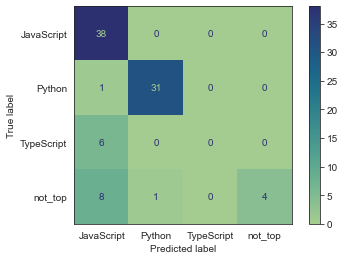


LogisticRegression(multi_class='multinomial', random_state=123)
Validate Scores
Accuracy Score: 58.97%
              precision    recall  f1-score   support

  JavaScript       0.53      0.94      0.68        17
      Python       0.78      0.50      0.61        14
  TypeScript       0.00      0.00      0.00         3
     not_top       0.00      0.00      0.00         5

    accuracy                           0.59        39
   macro avg       0.33      0.36      0.32        39
weighted avg       0.51      0.59      0.52        39



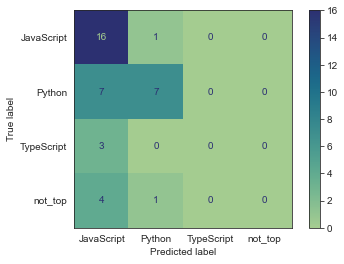


-------------------------------------------------------------------

DecisionTreeClassifier(max_depth=5, random_state=123)
Train Scores
Accuracy Score: 83.15%
              precision    recall  f1-score   support

  JavaScript       0.72      1.00      0.84        38
      Python       1.00      0.75      0.86        32
  TypeScript       1.00      0.50      0.67         6
     not_top       1.00      0.69      0.82        13

    accuracy                           0.83        89
   macro avg       0.93      0.74      0.79        89
weighted avg       0.88      0.83      0.83        89



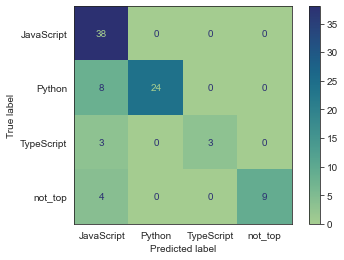


DecisionTreeClassifier(max_depth=5, random_state=123)
Validate Scores
Accuracy Score: 56.41%
              precision    recall  f1-score   support

  JavaScript       0.57      0.94      0.71        17
      Python       0.83      0.36      0.50        14
  TypeScript       0.00      0.00      0.00         3
     not_top       0.20      0.20      0.20         5

    accuracy                           0.56        39
   macro avg       0.40      0.37      0.35        39
weighted avg       0.57      0.56      0.52        39



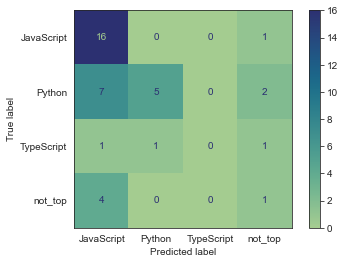


-------------------------------------------------------------------

RandomForestClassifier(max_depth=5, min_samples_leaf=3, random_state=123)
Train Scores
Accuracy Score: 73.03%
              precision    recall  f1-score   support

  JavaScript       0.63      1.00      0.78        38
      Python       0.92      0.75      0.83        32
  TypeScript       1.00      0.17      0.29         6
     not_top       1.00      0.15      0.27        13

    accuracy                           0.73        89
   macro avg       0.89      0.52      0.54        89
weighted avg       0.82      0.73      0.69        89



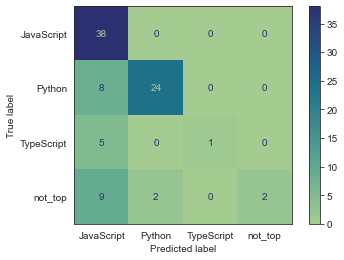


RandomForestClassifier(max_depth=5, min_samples_leaf=3, random_state=123)
Validate Scores
Accuracy Score: 58.97%
              precision    recall  f1-score   support

  JavaScript       0.55      1.00      0.71        17
      Python       0.75      0.43      0.55        14
  TypeScript       0.00      0.00      0.00         3
     not_top       0.00      0.00      0.00         5

    accuracy                           0.59        39
   macro avg       0.32      0.36      0.31        39
weighted avg       0.51      0.59      0.50        39



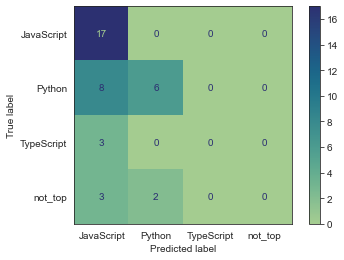


-------------------------------------------------------------------

KNeighborsClassifier()
Train Scores
Accuracy Score: 69.66%
              precision    recall  f1-score   support

  JavaScript       0.64      0.84      0.73        38
      Python       0.79      0.69      0.73        32
  TypeScript       0.60      0.50      0.55         6
     not_top       0.83      0.38      0.53        13

    accuracy                           0.70        89
   macro avg       0.71      0.60      0.63        89
weighted avg       0.72      0.70      0.69        89



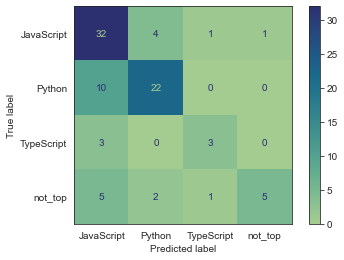


KNeighborsClassifier()
Validate Scores
Accuracy Score: 69.23%
              precision    recall  f1-score   support

  JavaScript       0.70      0.82      0.76        17
      Python       0.71      0.71      0.71        14
  TypeScript       0.00      0.00      0.00         3
     not_top       0.60      0.60      0.60         5

    accuracy                           0.69        39
   macro avg       0.50      0.53      0.52        39
weighted avg       0.64      0.69      0.66        39



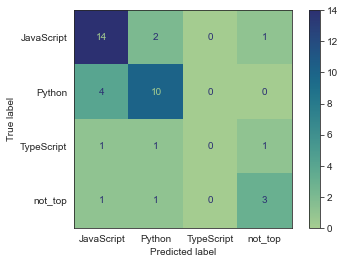


-------------------------------------------------------------------



In [28]:
# takes the model name and shows confusion matrix and classification report
for model, name in zip(model_list, model_names):
    score_df = test_model(X_train, y_train, X_validate, y_validate, model, name, score_df)
    
    make_models_and_print_metrics(model, model_names, X_train, y_train, X_validate, y_validate, language_names)

In [29]:
score_df.sort_values(by = 'test_score', ascending = False)

,model_name,train_score,validate_score,test_score
1,DecisionTree,83.15,56.41,56.25
3,KNN,69.66,69.23,56.25
2,RandomForest,73.03,58.97,53.12
0,LogisticRegression,82.02,58.97,50.00


In [30]:
cols = ['train_score', 'validate_score', 'test_score']

score_df[cols].mean()

train_score       76.965
validate_score    60.895
test_score        53.905
dtype: float64

In [31]:
score_df['mean'] = round(score_df.mean(numeric_only=True, axis=1),2)
score_df

,model_name,train_score,validate_score,test_score,mean
0,LogisticRegression,82.02,58.97,50.00,63.66
1,DecisionTree,83.15,56.41,56.25,65.27
2,RandomForest,73.03,58.97,53.12,61.71
3,KNN,69.66,69.23,56.25,65.05


In [32]:
train

,actual,lm_predicted,dtc_predicted,rf_predicted,knn_predicted
120,Python,Python,Python,Python,Python
72,JavaScript,JavaScript,JavaScript,JavaScript,JavaScript
44,JavaScript,JavaScript,JavaScript,JavaScript,JavaScript
191,not_top,not_top,JavaScript,JavaScript,not_top
19,Python,Python,JavaScript,JavaScript,JavaScript
...,...,...,...,...,...
179,JavaScript,JavaScript,JavaScript,JavaScript,JavaScript
114,Python,Python,Python,Python,Python
198,Python,Python,Python,JavaScript,Python
113,Python,Python,Python,Python,JavaScript


In [33]:
validate

,actual,lm_predicted,dtc_predicted,rf_predicted,knn_predicted
73,JavaScript,JavaScript,JavaScript,JavaScript,Python
171,Python,Python,not_top,Python,Python
169,JavaScript,JavaScript,not_top,JavaScript,JavaScript
48,Python,JavaScript,JavaScript,JavaScript,JavaScript
13,JavaScript,JavaScript,JavaScript,JavaScript,not_top
50,Python,JavaScript,not_top,JavaScript,JavaScript
42,JavaScript,JavaScript,JavaScript,JavaScript,JavaScript
107,JavaScript,JavaScript,JavaScript,JavaScript,JavaScript
138,JavaScript,JavaScript,JavaScript,JavaScript,JavaScript
153,not_top,JavaScript,JavaScript,JavaScript,not_top


In [35]:
test.head()

,actual,knn_predicted
168,Python,Python
41,JavaScript,JavaScript
182,JavaScript,JavaScript
96,Python,Python
181,Python,Python


In [36]:
print('KNN Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.knn_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.knn_predicted, test.actual))
print('---')
print(classification_report(test.actual, test.knn_predicted))

KNN Accuracy: 56.25%
---
Confusion Matrix
actual         JavaScript  Python  TypeScript  not_top
knn_predicted                                         
JavaScript             11       5           1        3
Python                  2       7           1        2
---
              precision    recall  f1-score   support

  JavaScript       0.55      0.85      0.67        13
      Python       0.58      0.58      0.58        12
  TypeScript       0.00      0.00      0.00         2
     not_top       0.00      0.00      0.00         5

    accuracy                           0.56        32
   macro avg       0.28      0.36      0.31        32
weighted avg       0.44      0.56      0.49        32

